In [77]:
using PhyloNetworks
using PhyloPlots
using Combinatorics
using Formatting

trees = readMultiTopology("data/rawdata/4taxa_trees.tre");

In [78]:
tree = trees[1]

HybridNetwork, Rooted Network
6 edges
7 nodes: 4 tips, 0 hybrid nodes, 3 internal tree nodes.
tip labels: 4, 3, 1, 2
(4:3.866,(3:1.593,(1:1.208,2:1.208):0.386):2.273);


In [79]:
[e.length for e in tree.edge]

6-element Vector{Float64}:
 3.866325
 1.593392
 1.207652
 1.207652
 0.38574
 2.272933

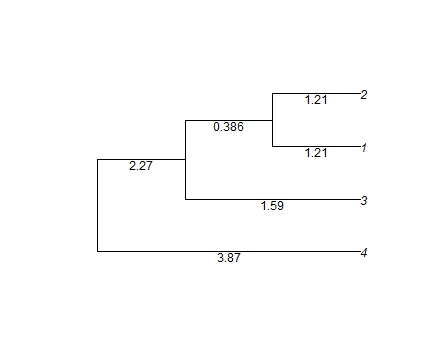

In [80]:
plot(tree, :R, showEdgeLength=true);

In [81]:
function num_bipartitions(n)
    return 2^(n-1) - 1
end;

In [82]:
# is there prinf with variable length in julia?

function show_bipartitions(n, start=0, stop=nothing)
    idx_width = length(string(num_bipartitions(n)))
    idx_fmt = FormatSpec(string(">", idx_width, "s"))
    node_width = length(string(n))
    node_fmt = fmt = FormatSpec(string(">", node_width, "s"))
    idx = 0
    node = Vector(1:n)
    println("idx\tpartition")
    for i in range(1, n÷2)
        
        comb = combinations(Vector(1:n), i)
        if i == n - i
            comb = Iterators.take(comb,  binomial(n,i)÷ 2)
        end
            
        for c in comb
            if start <= idx && (stop === nothing || idx <= stop)
                printfmt(idx_fmt, idx)
                print("\t")
                for e in c
                    printfmt(node_fmt, e)
                    print(" ")
                end
                print("| ")
                for e in sort(collect(setdiff(node ,Set(c))))
                    printfmt(node_fmt, e)
                    print(" ")
                end
                println()
            end
            idx += 1
        end
    end
end;

show_bipartitions(6)

idx	partition
 0	1 | 2 3 4 5 6 
 1	2 | 1 3 4 5 6 
 2	3 | 1 2 4 5 6 
 3	4 | 1 2 3 5 6 
 4	5 | 1 2 3 4 6 
 5	6 | 1 2 3 4 5 
 6	1 2 | 3 4 5 6 
 7	1 3 | 2 4 5 6 
 8	1 4 | 2 3 5 6 
 9	1 5 | 2 3 4 6 
10	1 6 | 2 3 4 5 
11	2 3 | 1 4 5 6 
12	2 4 | 1 3 5 6 
13	2 5 | 1 3 4 6 
14	2 6 | 1 3 4 5 
15	3 4 | 1 2 5 6 
16	3 5 | 1 2 4 6 
17	3 6 | 1 2 4 5 
18	4 5 | 1 2 3 6 
19	4 6 | 1 2 3 5 
20	5 6 | 1 2 3 4 
21	1 2 3 | 4 5 6 
22	1 2 4 | 3 5 6 
23	1 2 5 | 3 4 6 
24	1 2 6 | 3 4 5 
25	1 3 4 | 2 5 6 
26	1 3 5 | 2 4 6 
27	1 3 6 | 2 4 5 
28	1 4 5 | 2 3 6 
29	1 4 6 | 2 3 5 
30	1 5 6 | 2 3 4 


In [83]:
function show_bipartition(n, idx)
    show_bipartitions(n,idx,idx)
end;

show_bipartition(6, 12)

idx	partition
12	2 4 | 1 3 5 6 


In [84]:
# get the nodes that the branch has. 
function get_nodes(idx)
    nodes = []
    for i in 1:length(idx)
        if idx[i]
            append!(nodes, i)
        end
    end
    return nodes
end


function get_bipartition(tree, n)
    taxa = sort(tipLabels(tree))
    if length(taxa) != n
        print("check the parameter n")
        return
    end
    node = Vector(1:n)
    result = []
    idx = 0
    for i in tree.edge
        node_idx = hardwiredCluster(i,taxa)
        branch_node = get_nodes(node_idx)
        
        # if branch seperates more than half nodes, we use the small part to get bipartition idx
        if (length(branch_node) > n ÷ 2)
             branch_node = sort(collect(setdiff(node,branch_node)))
        end
        
        # generate all possible combination with the same number of nodes
        comb = collect(combinations(Vector(1:n), length(branch_node)))
        for c in 1:length(comb)
            if comb[c] == branch_node
                idx = c - 1
                break
            end
        end
        for j in 1:(length(branch_node) - 1)
            idx = idx + binomial(n,j)
        end
        push!(result,Pair(idx, i.length))
    end
    return result
end;

In [85]:
get_bipartition(tree, 4)

6-element Vector{Any}:
 3 => 3.866325
 2 => 1.593392
 0 => 1.207652
 1 => 1.207652
 4 => 0.38574
 3 => 2.272933

In [86]:
trees = readMultiTopology("data/rawdata/n6-1_astral.in");
tree = trees[1]
get_bipartition(tree, 6)

9-element Vector{Any}:
  4 => 0.07877169
  5 => 0.06931551
  3 => 0.03587151
  0 => 0.0256169
  1 => 0.01151126
  2 => 0.03644864
 11 => 0.003646167
 21 => 0.01414154
 20 => 0.03743503

In [87]:
trees = readMultiTopology("data/rawdata/8_taxa_1.trees");
tree = trees[1]
get_bipartition(tree, 8)

14-element Vector{Any}:
   6 => 2.075702026809264
   5 => 2.075702026809264
  33 => 1.679760395335379
   4 => 3.756462422144643
  88 => 1.9889874166339636
   3 => 5.744449838778606
 157 => 1.0648836653941887
   1 => 3.6009579347282648
   0 => 3.6009579347282648
   8 => 2.4886231269539105
   2 => 6.089581061682176
  36 => 0.7197524424906193
   7 => 4.57263257532424
   7 => 11.381966079497035